## Problem 1: Pattern-matching: The brute-force

### Problem 1.1: The brute-force pattern-matching algorithm
Describe a text D and a pattern P such that the brute-force pattern-matching algorithm runs in Ω(dp) time.The lengths of D and P are d and p, respectively.

In [19]:
def brute_pattern(D, P):
    d, p = len(D), len(P)
    
    for i in range(d - p + 1):
        k = 0
        while k < p and D[i + k] == P[k]:
            k +=1
        if k == p:
            return i
    
    return -1

In [20]:
text = input("Enter the Text : ")
pattern = input("Enter the Pattern: ")
index = brute_pattern(text, pattern)
print(f'The lowest index of the text {text} at which substring {pattern} begins is at {index} position ')

Enter the Text : abaadbacdbaddtaaab
Enter the Pattern: aaab
The lowest index of the text abaadbacdbaddtaaab at which substring aaab begins is at 14 position 


## Solution: 

1. We have implemented this pattern matching algorithm using Brute-Force approach. In this approach, we check and match every      character in pattern P with the text in D. 
2. It is very exhaustive in it's search and very inefficient. In this algorithm, when we match the first characters of both the    pattern and the text and if we get a match, we do the same step with the second character, then the third and so on. 
3. However if we get a mismatch between the two characters, we shift the pattern by one character and try matching the              characters for pattern and the text again. 
4. After finding the match for all characters, we return the starting index from where the match began. 
5. The running time for this algorithm is O(dp) where d and p are lengths of text and pattern respectively. 
6. For our case, D="abaadbacdbaddtaaab" and P="aaab". The brute force algorithm checks for each character of P in D. In our case    the match happens at the index 14 i.e. at the end of the text. So for p characters in the pattern, it matches d number of        times. Therefore our brute-force pattern-matching algorithm runs in Ω(dp).

### Problem 1.2: Python’s str class and pattern-matching
In this part, you are asked to modify three pattern matching programs given to you (See appendix). Run your modified programs for varying-length patterns and show your results. The count method in Python’s str class takes a text D and a pattern P and returns the maximum number of non-overlapping occurrences of a P within D. As an example ‘cdcdcdcdc’.count(‘cdc’) returns 2.

In [44]:
def brute_pattern(D, P):
    d, p = len(D), len(P)
    count = 0
    i = 0
    while (i < d - p + 1):
        k = 0
        while k < p and D[i + k] == P[k]:
            k += 1
            
        if k == p:
            count += 1
            i += k
        else:
            i += 1
    
    return count


def brute_pattern_overlap(D, P):
    count = 0
    n, m = len(D), len(P)
    i = 0
    while i < (n-m+1):
        k = 0
        while k < m and D[i+k] == P[k]:
            k += 1
        if k == m:
            count += 1
        i += 1
    return count

In [50]:
def random_strings(l, s):
    return ''.join(random.choice(letters) for i in range(s))

random.seed(5)
letters = "cd"

random_string = random_strings(letters, 10**5)
P = "ccd"

T = random_string + P

In [62]:
inputs = ["cdcdcdcdc","cdc","cdcdcdcdc","cd"] # text, pattern, text, pattern ...

for i in range(0,len(inputs)-1,2):
    text = inputs[i]
    pattern = inputs[i + 1]
    print(f'\nText : {text} \nPattern : {pattern}')
    count = brute_pattern(text, pattern)
    count1 = brute_pattern_overlap(text,pattern)
    print(f'\nThe maximum number of overlapping occurrences of a P within D are {count1} ')
    print(f'\nThe maximum number of non-overlapping occurrences of a P within D without using the in - built count() function are {count} ')
    print(f'\nThe maximum number of non-overlapping occurrences of a P within D with using the in - built count() function are {text.count(pattern)} ')

count2 = brute_pattern_overlap(T,P)
count3 = brute_pattern(T,P)
print("\n")
print("Checking the occurrences for very large size of text")
print(f'\nThe maximum number of overlapping occurrences of a P within T for a large value of T are {count2} ')
print(f'\nThe maximum number of non-overlapping occurrences of a P within for a large value of T are {count3} ')


Text : cdcdcdcdc 
Pattern : cdc

The maximum number of overlapping occurrences of a P within D are 4 

The maximum number of non-overlapping occurrences of a P within D without using the in - built count() function are 2 

The maximum number of non-overlapping occurrences of a P within D with using the in - built count() function are 2 

Text : cdcdcdcdc 
Pattern : cd

The maximum number of overlapping occurrences of a P within D are 4 

The maximum number of non-overlapping occurrences of a P within D without using the in - built count() function are 4 

The maximum number of non-overlapping occurrences of a P within D with using the in - built count() function are 4 


Checking the occurrences for very large size of text

The maximum number of overlapping occurrences of a P within T for a large value of T are 10 

The maximum number of non-overlapping occurrences of a P within for a large value of T are 10 


In [63]:
def find_boyer_moore(D, P):
    d, p = len(D), len(P)
    count = 0
    
    if p == 0:
        return 0
    
    last = {}
    
    for x in range(p):
        last[P[x]] = x
    
    i = p - 1
    k = p - 1
    
    while i < d - 1:
        # if match, decrease i, k
        
        if D[i] == P[k]:
            if k == 0:
                count += 1
                i += p
            else:
                i -= 1
                k -= 1
                
        # Not match, reset the position
        else:
            j = last.get(D[i], -1)
            i += p - min(k, j + 1)
            k = p - 1
            
    return count

def find_boyer_moore_overlap(D, P):
    count = 0
    n, m = len(D), len(P)
    if m == 0: 
        return 0
    last = {}
    for k in range(m):
        last[P[k]] = k
    i = m-1
    k = m-1
    while i < n:
        if D[i] == P[k]:
            if k == 0:
                count += 1
                i += m
                k = m-1
            else:
                i -= 1
                k -= 1
        else:
            j = last.get(D[i], -1)
            i += m - min(k, j+1)
            k = m-1
    return count

In [64]:
inputs = ["cdcdcdcdc","cdc","cdcdcdcdc","cd"] # text, pattern, text, pattern ...

for i in range(0,len(inputs)-1,2):
    text = inputs[i]
    pattern = inputs[i + 1]
    print(f'\nText : {text} \nPattern : {pattern}')
    count = find_boyer_moore(text, pattern)
    count1 = find_boyer_moore_overlap(text,pattern)
    print(f'\nThe maximum number of overlapping occurrences of a P within D are {count1} ')
    print(f'\nThe maximum number of non-overlapping occurrences of a P within D without using the in - built count() function are {count} ')
    print(f'\nThe maximum number of non-overlapping occurrences of a P within D with using the in - built count() function are {text.count(pattern)} ')

    
count4 = find_boyer_moore_overlap(T,P)
count5 = find_boyer_moore(T,P)
print("\n")
print("Checking the occurrences for very large size of text")
print(f'\nThe maximum number of overlapping occurrences of a P within T for a large value of T are {count4} ')
print(f'\nThe maximum number of non-overlapping occurrences of a P within for a large value of T are {count5} ')


Text : cdcdcdcdc 
Pattern : cdc

The maximum number of overlapping occurrences of a P within D are 4 

The maximum number of non-overlapping occurrences of a P within D without using the in - built count() function are 2 

The maximum number of non-overlapping occurrences of a P within D with using the in - built count() function are 2 

Text : cdcdcdcdc 
Pattern : cd

The maximum number of overlapping occurrences of a P within D are 4 

The maximum number of non-overlapping occurrences of a P within D without using the in - built count() function are 4 

The maximum number of non-overlapping occurrences of a P within D with using the in - built count() function are 4 


Checking the occurrences for very large size of text

The maximum number of overlapping occurrences of a P within T for a large value of T are 10 

The maximum number of non-overlapping occurrences of a P within for a large value of T are 15 


In [65]:
def compute_kmp_pi_table(P):
    
    p = len(P)
    lps = [0] * p
    
    j = 1
    k = 0
    
    while j < p:
        if P[j] == P[k]:
            lps[j] = k + 1
            j += 1
            k += 1
            
        elif k > 0:
            k = lps[k - 1]
        
        else:
            j += 1
    
    return lps

def find_kmp(D, P):
    
    d, p = len(D), len(P)
    if p == 0:
        return 0
    
    pi_table = compute_kmp_pi_table(P)
    
    i = 0
    j = 0
    count = 0
    
    while i < d:
        if D[i] == P[j]:
            if j == p - 1:
                count += 1
                i += j
                j = 0
            else:
                i += 1
                j += 1

        elif j > 0:
            j = pi_table[j - 1]
        
        else:      # When j is 0
            i += 1
            
    return count

def find_kmp_overalap(D, P):
    count = 0
    n, m = len(D), len(P)
    if m == 0:
        return 0
    fail = compute_kmp_pi_table(P)
    j = 0
    k = 0
    while j < n:
        if D[j] == P[k]:
            if k == m-1:
                count += 1
                k = fail[k-1]
            else:
                j += 1
                k += 1
        elif k > 0:
            k = fail[k-1]
        else:
            j += 1
    return count

In [66]:
inputs = ["cdcdcdcdc","cdc","cdcdcdcdc","cd"] # text, pattern, text, pattern ...

for i in range(0,len(inputs)-1,2):
    text = inputs[i]
    pattern = inputs[i + 1]
    print(f'\nText : {text} \nPattern : {pattern}')
    count = find_kmp(text, pattern)
    count1 = find_kmp_overalap(text,pattern)
    print(f'\nThe maximum number of overlapping occurrences of a P within D are {count1} ')
    print(f'\nThe maximum number of non-overlapping occurrences of a P within D without using the in - built count() function are {count} ')
    print(f'\nThe maximum number of non-overlapping occurrences of a P within D with using the in - built count() function are {text.count(pattern)} ')
    

    
count5 = find_kmp_overalap(T,P)
count6 = find_kmp(T,P)
print("\n")
print("Checking the occurrences for very large size of text")
print(f'\nThe maximum number of overlapping occurrences of a P within T for a large value of T are {count5} ')
print(f'\nThe maximum number of non-overlapping occurrences of a P within for a large value of T are {count6} ')


Text : cdcdcdcdc 
Pattern : cdc

The maximum number of overlapping occurrences of a P within D are 4 

The maximum number of non-overlapping occurrences of a P within D without using the in - built count() function are 2 

The maximum number of non-overlapping occurrences of a P within D with using the in - built count() function are 2 

Text : cdcdcdcdc 
Pattern : cd

The maximum number of overlapping occurrences of a P within D are 4 

The maximum number of non-overlapping occurrences of a P within D without using the in - built count() function are 4 

The maximum number of non-overlapping occurrences of a P within D with using the in - built count() function are 4 


Checking the occurrences for very large size of text

The maximum number of overlapping occurrences of a P within T for a large value of T are 10 

The maximum number of non-overlapping occurrences of a P within for a large value of T are 10 


## Solution:

1. We have implemented the pattern matching algorithms by checking the number of overlapping as well as non-overlapping occurences of the pattern string in text
2. We have also used the in-built count method for checking the non-overlapping occurences
3. First we checked our pattern "cdc" with the text "cdcdcdcdc" for overlapping and non-overlapping occurences. Here the last character in the pattern i.e. "c" overlaps with the next occurence of "cdc". So for non-overlapping occurences such an occurence is ignored.
4. Then directly the occurence in which "c" does not overlap with the next occurence is checked. So after doing that we get our number of occurence as 2. 
5. For overlapping occurences, we get the number of occurences as 4.
6. The same logic is applied to our second case in which the number of non-overlapping and overlapping occurences are same.
7. Then lastly we checked for a large sized text and a small pattern and got the number of overlapping and non-overlapping occurences for both

## Problem 2: Experimental Analysis of Pattern-Matching Algorithms

Perform an experimental analysis of pattern matching algorithms in terms of:

1. Number of character comparison: Perform an experimental analysis of the efficiency of the brute-force, the KMP and Boyer-        Moore pattern matching algorithms for varying-length patterns.
2. Relative speed comparison: Perform an experimental comparison of the brute-force, KMP, and Boyer-Moore pattern-matching          algorithms. Run each algorithm against large text documents using varying-length patterns and report the relative running        times.

In [32]:
# Brute- force algorithm
def brute_pattern(D, P):
    d, p = len(D), len(P)
    
    char_compare = 0
    
    for i in range(d - p + 1):
        k = 0
        if D[i + k] != P[k]:
            char_compare += 1
            
        while k < p and D[i + k] == P[k]:
            char_compare += 1
            k +=1
        if k == p:
            return char_compare
    return char_compare

# Boyer Moore Algorithm
def find_boyer_moore(D, P):
    d, p = len(D), len(P)
    char_compare = 0
    if p == 0:
        return 0
    
    last = {}
    
    for x in range(p):
        last[P[x]] = x
    
    i = p - 1
    k = p - 1
    
    while i < d:
        # if match, decrease i, k
        
        if D[i] == P[k]:
            if k == 0:
                return char_compare
            else:
                char_compare += 1
                i -= 1
                k -= 1
                
        # Not match, reset the position
        else:
            char_compare += 1
            j = last.get(D[i], -1)
            i += p - min(k, j + 1)
            k = p - 1
            
    return char_compare

# KMP Algorithm
def compute_kmp_pi_table(P):
    
    p = len(P)
    lps = [0] * p
    
    j = 1
    k = 0
    
    
    while j < p:
        if P[j] == P[k]:
            lps[j] = k + 1
            j += 1
            k += 1
            
        elif k > 0:
            k = lps[k - 1]
        
        else:
            j += 1
    
    return lps

def find_kmp(D, P):
    
    d, p = len(D), len(P)
    if p == 0:
        return 0
    char_compare = 0
    pi_table = compute_kmp_pi_table(P)
    
    i = 0
    j = 0
    
    while i < d:
        if D[i] == P[j]:
            if j == p - 1:
                return char_compare
            char_compare += 1
            i += 1
            j += 1

        elif j > 0:
            char_compare += 1
            j = pi_table[j - 1]
        
        else:      # When j is 0
            char_compare += 1
            i += 1
            
    return char_compare

<BarContainer object of 3 artists>

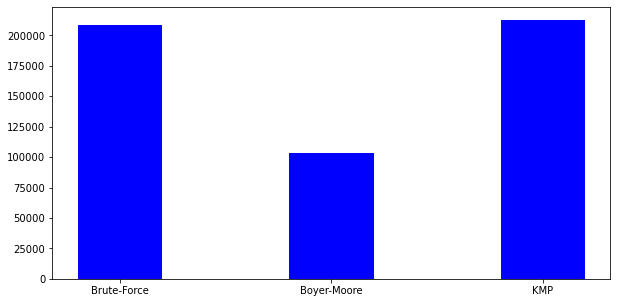

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import string
import random
import time

fig = plt.figure(figsize = (10, 5))

algorithms = ["Brute-Force", "Boyer-Moore","KMP"]


char_bf = []
char_bm = []
char_kmp = []

time1 = []
time2 = []
time3 = []
n = []

for i in range(1,100000,1000):
    
    
    pattern = ''.join(random.choices(string.ascii_uppercase, k = 500 + i))
    text = ''.join(random.choices(string.ascii_uppercase, k = 10000 + i)) + pattern
    
    n.append(len(pattern))
    
    start1 = time.time()
    brute_force = brute_pattern(text, pattern)
    end1 = time.time()
    time1.append(end1 - start1)
    char_bf.append(brute_force)
    
    start2 = time.time()
    boyer_moore = find_boyer_moore(text, pattern)
    end2 = time.time()
    time2.append(end2 - start2)
    char_bm.append(boyer_moore)
    
    
    start3 = time.time()
    kmp = find_kmp(text, pattern)
    end3 = time.time()
    time3.append(end3 - start3)
    char_kmp.append(kmp)

comparisons = [brute_force, boyer_moore, kmp]

plt.bar(algorithms, comparisons, color ='blue', width = 0.4)

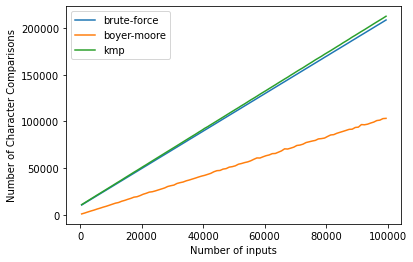

In [34]:
plt.figsize=(8,6)
plt.plot(n, char_bf, label="brute-force")
plt.plot(n, char_bm, label="boyer-moore")
plt.plot(n, char_kmp, label="kmp")
plt.xlabel("Number of inputs")
plt.ylabel("Number of Character Comparisons")
plt.legend()
plt.show()

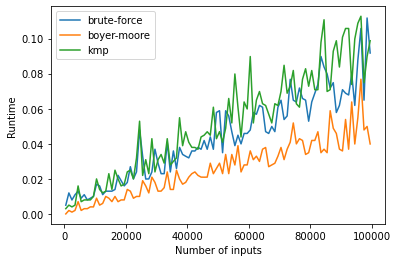

In [35]:
plt.figsize=(8,6)
plt.plot(n, time1, label="brute-force")
plt.plot(n, time2, label="boyer-moore")
plt.plot(n, time3, label="kmp")
plt.xlabel("Number of inputs")
plt.ylabel("Runtime")
plt.legend()
plt.show()

## Solution:

1. We calculated the character comparisons and runtimes for all the three pattern matching algorithms : Brute-Force, Boyer-Moore and KMP.
2. The KMP pattern matching algorithm follows a degenrative property. In this approach, when we get a match with our window and the text, we shift the window by 1 and then we directly check the last character of the window with the character in the text. This is because we already know that the previous characters had matched the characters of the text. This reduces the time complexity. If we get a mismatch we then check each character of window starting from the last position of window. 
3. We perform this step till we get a match and then the same steps are performed.
4. The Boyer-Moore algorithm follows a backward approach. In this, the pattern P is alligned with the beginning of the text D and then it directly checks the last character of P with T.
5. If there is mismatch yet the character is present in the pattern then the pattern is alligned with text along the last occurence of the character in the pattern.
6. In case if a character is not present within the pattern then no match can be found for this and so the pattern is sifted entirely past the mismatching character.
7. After checking the number of comparisons for the three algorithms, we found that the Boyer-Moore algorithm performed the least number of character comparisons and the KMP algorithm performed the most number of comparisons slightly above Brute-Force.
8. After checking the running time, we found that the Boyer-Moore was faster compared to KMP and Brute-Force algorithms.

## Problem 3: Matrix-chain Multiplication

#### he matrix-chain multiplication problem: Given a chain of < D1, D2, . . . , Dn > of n matrices fully parenthesize the product < D1 ·D2 ···Dn > in a way so that the number of scalar multiplications is minimized. Each Di has a pi−1 ×pi dimension and i = 1, 2, . . . , n.

The Brute Force Approach :

In [14]:
def MatrixChainOrder2(p,i,j):
    if i == j:
        return 0
  
    minVal = float('inf')

    for k in range(i,j):
        #print(p[i],p[j])
        count = (MatrixChainOrder2(p,i,k) + MatrixChainOrder2(p,k + 1,j)+ p[i-1]*p[k]*p[j])
        
        if count < minVal:
            minVal = count
      
    return minVal
  
  
l = [1, 2, 3, 4, 3]
n = len(l)
  
print("The minimum number of multiplications using the Brute Force approach is :")
print(MatrixChainOrder2(l,1,n-1))

The minimum number of multiplications using the Brute Force approach is :
30


The Dynamic Programming Approach :

In [30]:
import numpy as np

def printOptimalParents(s,i,j):
    if i==j:
        print("A{}".format(i) ,end="")
    else:
        print("(",end="")
        printOptimalParents(s,i,s[i][j])
        printOptimalParents(s,s[i][j]+1,j)
        print(")",end="")

def MatrixChainOrder(p):
    n = len(p)
    m = [[0 for x in range(n)] for x in range(n)]
    s = [[0 for x in range(n)] for x in range(n)]
    for l in range(2,n):
        #print('l = ',l)
        for i in range(1,n-l+1):
            #print('i = ',i)
            j = i+l-1
            #print('j = ',j)
            m[i][j] = float('inf')
            
            for k in range(i,j):
                #print('k = ',k , 'i = ',i , 'j = ',j, 'l = ',l)
                q = m[i][k]+m[k+1][j]+p[i-1]*p[k]*p[j]
                #print(q)
                if q<m[i][j]:
                    #print('inside if')
                    m[i][j]=q
                    s[i][j]=k
                    #print(s)
    #print(m)
    m1 = np.array(m)
    #print(m1)
    print("The matrix after computing optimal costs is : ")
    print(m1[1:,1:])
    print("\n")
    s1 = np.array(s)
    print("The matrix required for computing optimal solution is : ")
    print(s1[1:-1,2:])
    print("\n")
    print("The parenthesization for the matrix multiplication is : ")
    printOptimalParents(s,i,j)
    print("\n")
    #a=printOptimalParents(s,i,j)
    #print(type(a))
    return (m1[1,-1],s1[1:-1,2:])
            
    
p = [30,35,15,5,10,20,25]
result = MatrixChainOrder(p)
print("The minimum number of multiplications is : ")
print(result[0])

The matrix after computing optimal costs is : 
[[    0 15750  7875  9375 11875 15125]
 [    0     0  2625  4375  7125 10500]
 [    0     0     0   750  2500  5375]
 [    0     0     0     0  1000  3500]
 [    0     0     0     0     0  5000]
 [    0     0     0     0     0     0]]


The matrix required for computing optimal solution is : 
[[1 1 3 3 3]
 [0 2 3 3 3]
 [0 0 3 3 3]
 [0 0 0 4 5]
 [0 0 0 0 5]]


The parenthesization for the matrix multiplication is : 
((A1(A2A3))((A4A5)A6))

The minimum number of multiplications is : 
15125


The Memoization Approach using Dynamic Programming :

In [16]:
m = [[-1 for x in range(100)] for x in range(100)]
def MatrixChainOrderMemo(p,i,j):
    if i==j:
        return 0
    if m[i][j]!=-1:
        return m[i][j]
    m[i][j] = float('inf')
    for k in range(i,j):
        m[i][j] = min(m[i][j],MatrixChainOrderMemo(p,i,k) + MatrixChainOrderMemo(p,k+1,j) + p[i-1]*p[k]*p[j])
        
    #m[i][j]=count
    #print(m[i][j])
    return m[i][j]

p = [30,35,15,5,10,20,25]
n = len(p)
  
print("The minimum number of multiplications using Memoization is :")
print(MatrixChainOrderMemo(p,1,n-1))

The minimum number of multiplications using Memoization is :
15125


In [21]:
import time

p = [x for x in range(16)]
start1 = time.time()
MatrixChainOrder2(p,1,len(p)-1)
end1 = time.time()
running_time = end1 - start1
print("The running time for Matrix Chain Multiplication using Brute Force is :",running_time)

The running time for Matrix Chain Multiplication using Brute Force is : 2.8633363246917725


In [27]:
p = [x for x in range(16)]
start3 = time.time()
MatrixChainOrder(p)
end3 = time.time()
running_time3 = end3 - start3
print("The running time for Matrix Chain Multiplication using Dynamic Bottom-Up approach is :",running_time3)

The running time for Matrix Chain Multiplication using Dynamic Bottom-Up approach is : 0.000997304916381836


In [29]:
m = [[-1 for x in range(100)] for x in range(100)]
p = [x for x in range(16)]
#print(p)
start4 = time.time()
MatrixChainOrderMemo(p,1,len(p)-1)
end4 = time.time()
running_time4 = end4 - start4
print("The running time for Matrix Chain Multiplication using Memoization is :",running_time4)

The running time for Matrix Chain Multiplication using Memoization is : 0.0009965896606445312


## Solution:

1. We have implemented the Matrix Chain Multiplication program to using three approaches : Brute Force, Dynamic Programming and Memoization.
2. The Matrix Chain Multiplication problem does not calculate the product of the matrices. It determines the order in which the matrices are multiplied i.e. the parenthesization of the resultant matrix in such a way that the number of scalar multiplication operations are least minimum.
3. Our first approach which is the Brute Force approach is a rather simplistic and naive way of calculating the least number of operations. This is a recursive approach which enumerates all possible parenthesizations for the product matrix. We then choose the minimum number of operations from the computed costs to determine an effective way of multiplying the matrices. This approach is very inefficient as it runs in exponential time.
4. To improve our solution, we solved this problem again this time using Dynamic Programming. We created two matrices m and s at first which have only zeroes inside. We then calculated the optimal cost of multiplication operations and stored them in matrix m by recursively breaking our problem into sub-problems and calculating optimal costs as per the index at which parenthesization occurs.
5. We then stored this index in matrix s. Then we finally used the matrix s to print the parenthesis and order of multiplication of matrices. Doin all this required a time complexity of O(n^3)
6. We futher improved our solution by implementing this program using memoization. In this, we computed a cost once and stored it so that it can be used for further computation. We therefore do not need to find the cost again and again and it saves a lot of time.
7. We also calculated runtimes for each approach and found that Brute-Force was extremely slow compared to Dynmamic and Memoization. The memoization was a bit fast compared to the dynamic approach.

## Problem 4: Longest Common Sub-sequence (LCS) Problem

Implement a Python program to solve LCS problem using dynamic programming. Run your program to find the best sequence alignment between DNA strings. Show your results. Longest Common Sub-sequence (LCS) problem: Given two character strings over some
alphabet, find a longest string that is a sub-sequence of given two strings.

In [17]:
def LCS (A,B):
    
    n1 = len(A)
    n2 = len(B)
    
    lcs = [[0] * (n2 + 1)  for i in range(n1+1)]  # created the lcs table for storing the values
    
    for i in range (n1 + 1):
        for j in range(n2 + 1):
            if i == 0 or j == 0:   # storing 0's in the first row and first column
                lcs[i][j] = 0
            elif A[i - 1] == B[j - 1]:  # when there is a match, we add 1 to the value of the previous row or previous column
                lcs[i][j] = 1 + lcs[i - 1][j - 1]
            else:
                lcs[i][j] = max(lcs[i - 1][j], lcs[i][j - 1])  # when there is a mismatch we store the maximum value among the value of previous row and value of previous column
    
    idx = lcs[n1][n2] # value of last unit of the matrix which is the length of the longest common subsequence
    print (f'\nLength of the longest common subsequence is {idx}')
    
    
    lcs_string = [""] * idx
    
    m = n1
    n = n2
    
    # Printing the LCS from the LCS table
    while m > 0 and n > 0:
        
        if A[m - 1] == B[n - 1]:  # when there is a match, we store that character in our string array and decrement the indices
            lcs_string[idx - 1] = B[n - 1]
            idx -= 1
            m -= 1
            n -= 1
            
        elif lcs[m - 1][n] > lcs[m][n - 1]:
            m -= 1
        else:
            n -= 1
    
    lcs_string_join = (''.join(lcs_string))
    print(f'\nThe Longest Common Sub-sequence of strings "{A}" and "{B}" is {lcs_string_join}')

In [18]:
LCS('stone', 'longest')
LCS('ACCGGTCGAGTGCGCGGAAGCCGGCCGAA','GTCGTTCGGAATGCCGTTGCTCTGTAAA')


Length of the longest common subsequence is 3

The Longest Common Sub-sequence of strings "stone" and "longest" is one

Length of the longest common subsequence is 20

The Longest Common Sub-sequence of strings "ACCGGTCGAGTGCGCGGAAGCCGGCCGAA" and "GTCGTTCGGAATGCCGTTGCTCTGTAAA" is GTCGTCGGAAGCCGGCCGAA


## Solution:

1. We have implemented the Longest Common Subsequence Problem using Dynamic Programming which follows a bottom-up approach. In      this algorithm, we are finding the sequence that appears in the same order and is present in both the strings. 
2. There may be multiple sequences having same order, however we find the longest sequence among these. 
3. This algorithm can also be implemented using the Naive Approach. In this we check all the subsequences of first and second      string and keep track of the maximum i.e. the longest sequence. However the time complexity for this is  O(n^2 * m) where        O(n^2) is the complexity for getting the substring and O(m) is the complexity for checking the substring with that of the        second string. 
4. For implementing this dynamically, we created a matrix lcs of size n1 * n2 where n1 and n2 are lengths of strings A and B        respectively. 
5. This matrix is used to store the solutions of substrings which we can use later. 
6. The values in this matrix are set to 1 when there is a match and set to maximum value of previous row and column values. 7. 7. After iterating through the matrix the last value in the matrix which we get is the length of longest common subsequence. 
8. The time complexity using this approach is O(n * m).